# Índice de Rae 

Para medir la competitividad en las elecciones del 2018 en Coyoacán utilizamos el índice de Rae. El índice de Rae es una variante del índice de IHH. <br>
La fórmula del índice de RAE está data por 
$$ IRAE=1-IHH$$
Donde el IHH está dado por
$$IHH=\sum_{i=0}^{n-1}(s_{i})^2 $$
Donde $s_i=\frac{x_i}{\sum_{j=0}^{n-1}x_j}$ y $n$ es el número de partidos participantes.
<br>
Para nuestros fines utilizaremos la siguiente fórmula 
$$
IRAE_{i}=1-\sum_{j=0}^{n-1}(s_{ij})^2
$$
Que es el índice de Rae para el $i-ésima$ sección electoral. Así podemos cuantificar la competitividad en todos las secciones electorales.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
df=pd.read_csv("/home/diego/Escritorio/Thesis/clean_data/data/elecciones_09_12_15_18/co_2018.csv")

In [128]:
df.head()

,Sección,id distrito,Distrito,total boletas sobrantes,total personas votaron,total votos sacados,PAN,PRI,PRD,PVEM,...,%C.Común (PT-PES),%C.Común (MORENA-PES),%Coalición (PAN-PRD-MC),%Coalición (PAN-PRD),%Coalición (PAN-MC),%Coalición (PRD-MC),%Nulos,%No registrados,%TOTAL_MORENA-PES-PT,%TOTAL_PAN-PRD-MC
0,345,78,78,443,1185,1179,254,115,262,35,...,0.0000,0.168776,1.265823,0.337553,0.000000,0.084388,1.772152,0.337553,32.489451,47.932489
1,346,26,26,92,320,320,96,43,38,11,...,0.3125,0.000000,0.937500,1.250000,0.000000,0.000000,1.250000,0.625000,32.187500,46.875000
2,347,78,78,479,1358,1357,411,154,207,44,...,0.0000,0.147275,0.810015,0.441826,0.147275,0.000000,2.061856,0.220913,29.307806,50.515464
3,348,78,78,578,1708,1708,372,200,401,48,...,0.0000,0.117096,0.585480,0.409836,0.000000,0.000000,2.868852,0.409836,30.210773,48.419204
4,349,52,52,282,810,811,268,110,132,23,...,0.0000,0.000000,0.246914,0.246914,0.000000,0.000000,2.716049,0.370370,24.938272,52.098765


In [129]:
#Definimos la función par calcular el IHH y el IRAE con la sguiente función.
#El resusltado en una lista con los IRAE por sección electoral.7
#Recibe:
#data: El data frame con los datos(csv,xls,xlsx,etc.)
#names:nombre de las columnas del los votos de los partidos o cantidatos.
#t=Nombre de la columna con el nombre de las bases 
def irae(data,names,t):
    lista=[]
    IRAE=[]
    #Calcula los cocientes de los partidos o candidatos
    for i in names:
        lista.append(list((round(df[i]/df[t],4)**2)))
    #Calcula el índice RAE
    for j in range(len(lista[0])):
        a=0
        for h in range(len(lista)):
            a+=lista[h][j]
        IRAE.append(round(1-round(a,4),4))
    return(IRAE)   

In [130]:
df.columns

Index(['Sección', 'id distrito', 'Distrito', 'total boletas sobrantes',
       'total personas votaron', 'total votos sacados', 'PAN', 'PRI', 'PRD',
       'PVEM', 'PT', 'MC', 'NA', 'MORENA', 'PES', 'PH',
       'C.Común (PT-MORENA-PES)', 'C.Común (PT-MORENA)', 'C.Común (PT-PES)',
       'C.Común (MORENA-PES)', 'Coalición (PAN-PRD-MC)', 'Coalición (PAN-PRD)',
       'Coalición (PAN-MC)', 'Coalición (PRD-MC)', 'TOTAL PAN-PRD-MC',
       'TOTAL MORENA-PT-PES', 'Nulos', 'No registrados',
       'total votos asentados', 'total votos calculados', 'PADRON_TOTAL',
       'LISTANOMINAL_TOTAL', '%PAN', '%PRI', '%PRD', '%PVEM', '%PT', '%MC',
       '%NA', '%MORENA', '%PES', '%PH', '%C.Común (PT-MORENA-PES)',
       '%C.Común (PT-MORENA)', '%C.Común (PT-PES)', '%C.Común (MORENA-PES)',
       '%Coalición (PAN-PRD-MC)', '%Coalición (PAN-PRD)',
       '%Coalición (PAN-MC)', '%Coalición (PRD-MC)', '%Nulos',
       '%No registrados', '%TOTAL_MORENA-PES-PT', '%TOTAL_PAN-PRD-MC'],
      dtype='object')

In [131]:
pt=irae(df,["TOTAL PAN-PRD-MC","TOTAL MORENA-PT-PES","PRI","NA","PH","PVEM"],"total personas votaron")

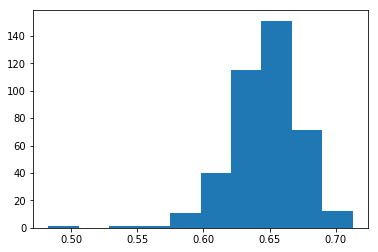

In [137]:
plt.hist(pt)
plt.show()

In [139]:
df["IRAE"]=pd.DataFrame(pt)    

In [143]:
max(pt)

0.7128

In [144]:
min(pt)

0.4829

In [145]:
#Guardamos está nueva base con el IRAE incluido
write=pd.ExcelWriter('/home/diego/Escritorio/Thesis/clean_data/data/elecciones_09_12_15_18/co_2018.xlsx')
df.to_excel(write,"hoja de calculo",index=False)
write.save()